# Melting Curve Analysis monovalent metal ions - KLTL_GAAA polyA

In [1]:
#Import everything from main
from main import  *

If you want to align your legend values on the right, you can use the following function.

In [2]:
# legende in plots rechts aligned
def legend_text_right_align(legend, width):
    hp = legend._legend_box.get_children()[1]
    for vp in hp.get_children():
        for row in vp.get_children():
            row.set_width(width)  # need to adapt this manually
            row.mode = "expand"
            row.align = "right"

#### Import data and add meta data
This program uses 'report-csv'-data files. Place them in the "data_raw" directory. Every file in this folder will be loaded.

In [3]:
#Optinal input of metadata, which should be applied to one data-file  ->  {'file_name': {'meta_name_1': meta_value}}
EXTRA_META = {'2023-09-19_RNA_melting_KCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'K(I)'}, 
              '2023-09-20_RNA_melting_KCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'K(I)'},
              '2023-09-21_RNA_melting_HEPES_KCl.csv': {'Sample': 'RNA', 'bg in mM': 0, '[Buffer] in mM': 0, 'Monovalent Ion': 'K(I)'},
              '2023-09-21_RNA_melting_NaCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'Na(I)'},
              '2023-09-24_RNA_melting_NaCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'Na(I)'},
              '2023-11-01_RNA_melting_HEPES_NaCl.csv': {'Sample': 'RNA', 'bg in mM': 0, '[Buffer] in mM': 0, 'Monovalent Ion': 'Na(I)'},
              '2023-11-08_RNA_melting_EDTA_HEPES_KCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'K(I)'},
              '2024-01-22_RNA_melting_HEPES_KCl.csv': {'Sample': 'RNA', 'bg in mM': 0, '[Buffer] in mM': 0, 'Monovalent Ion': 'K(I)'},
              '2024-01-25_RNA_melting_KCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'K(I)'},
              '2024-01-26_RNA_melting_KCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'K(I)'},
              '2024-01-29_RNA_melting_NaCl_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 0, '[Buffer] in mM': 0, 'Monovalent Ion': 'Na(I)'},
              '2024-01-31_RNA_melting_NaCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'Na(I)'},
              '2024-02-01_RNA_melting_NaCl.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Monovalent Ion': 'Na(I)'}
             }# optinal: spezifisch fuer eine Messung kann hier jeweils Metadaten hinzugefuegt werden

#Create class object --> nicht optional
data_obj = MeltingCurveAnalysis(EXTRA_META)
#Load all files from 'data_raw' folder --> nicht optional
# ALLE Messungen im Ordner werden eingeladen!!!
data_obj.fill_data_dict()


#Generation of meta data, from the given sample name and add them to meta, all file names in '[]' 
data_obj.meta_from_name_Paul(['2023-09-19_RNA_melting_KCl.csv', 
                              '2023-09-20_RNA_melting_KCl.csv',
                              '2023-09-21_RNA_melting_HEPES_KCl.csv',
                              '2023-09-21_RNA_melting_NaCl.csv',
                              '2023-09-24_RNA_melting_NaCl.csv',
                              '2023-11-01_RNA_melting_HEPES_NaCl.csv',
                              '2023-11-08_RNA_melting_EDTA_HEPES_KCl.csv',
                              '2024-01-22_RNA_melting_HEPES_KCl.csv',
                              '2024-01-25_RNA_melting_KCl.csv',
                              '2024-01-26_RNA_melting_KCl.csv',
                              '2024-01-29_RNA_melting_NaCl_HEPES.csv',
                              '2024-01-31_RNA_melting_NaCl.csv',
                              '2024-02-01_RNA_melting_NaCl.csv'
                             ])# Funktion heisst .meta_from_name_Paul --> wieder fuer alle Messungen einzeln aufschreiben
#Ceate an overview of all curves in folder data_raw, this function takes metadata from all curves and puts them in one dataframe
data_obj._create_meta_overview()
data_obj.meta_overview # gi ist einfach nur ein index der durchzaehlt

,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,gi,file_name,Sample,bg in mM,[Buffer] in mM,Monovalent Ion,Concentration,Concentration Unit
0,1,5 mM MgCl2,260.0,90.0,21.0,1,Cooling,1,2023-07-26_RNA_melting_MgCl2.csv,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5 mM MgCl2,260.0,21.0,90.0,1,Heating,2,2023-07-26_RNA_melting_MgCl2.csv,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5 mM MgCl2,260.0,90.0,21.0,2,Cooling,3,2023-07-26_RNA_melting_MgCl2.csv,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5 mM MgCl2,260.0,21.0,90.0,2,Heating,4,2023-07-26_RNA_melting_MgCl2.csv,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1 mM MgCl2,260.0,90.0,21.0,1,Cooling,5,2023-07-26_RNA_melting_MgCl2.csv,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,28,10 mM CaCl2,400.0,21.0,90.0,2,Heating,1212,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,NaN,NaN,NaN,NaN,NaN,NaN
1212,29,5 mM CaCl2,400.0,90.0,21.0,1,Cooling,1213,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,NaN,NaN,NaN,NaN,NaN,NaN
1213,30,5 mM CaCl2,400.0,21.0,90.0,1,Heating,1214,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,NaN,NaN,NaN,NaN,NaN,NaN
1214,31,5 mM CaCl2,400.0,90.0,21.0,2,Cooling,1215,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,NaN,NaN,NaN,NaN,NaN,NaN


You may also want to plot multiple curves or get some specific data. You may filter 'meta_overview' and extract from that dataframe the file name and the measurement index.
An 'easy' way to do so is using the 'apply_filters'-function. You can now group the remaining values and do with them whatever you want. For example plot them. 

In diesem Skript sollen nur die Messungen der monovalenten Metallionen betrachtet werden --> es wird nach K(I) und Na(I) gefiltert und in filtered_data gespeichert --> dort stehen aber nur die Messungen drin, keine Messwerte.

In [4]:
# hier kann ganz einfach nach jeder beliebigen spalte in allen Messungen auf einmal gefiltert werden, je nach meinen angegebenen filter-parametern
# nur messungen mit monovalenten Titrationen filtern
filtered_data = data_obj.apply_filters({#'file_name': ['2023-09-19_RNA_melting_KCl.csv'],
                                        'Wavelength (nm)': [260], 'Monovalent Ion':['Na(I)', 'K(I)']
                                        #'Concentration': [1, 5]
                                       })
filtered_data
filtered_data.to_csv('filtered_data_monovalent.csv', index=False)
filtered_data

,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,gi,file_name,Sample,bg in mM,[Buffer] in mM,Monovalent Ion,Concentration,Concentration Unit
288,1,100 mM KCl,260.0,90.0,21.0,1,Cooling,289,2023-09-19_RNA_melting_KCl.csv,RNA,16.0,20.0,K(I),100.0,mM
289,2,100 mM KCl,260.0,21.0,90.0,1,Heating,290,2023-09-19_RNA_melting_KCl.csv,RNA,16.0,20.0,K(I),100.0,mM
290,3,100 mM KCl,260.0,90.0,21.0,2,Cooling,291,2023-09-19_RNA_melting_KCl.csv,RNA,16.0,20.0,K(I),100.0,mM
291,4,100 mM KCl,260.0,21.0,90.0,2,Heating,292,2023-09-19_RNA_melting_KCl.csv,RNA,16.0,20.0,K(I),100.0,mM
292,5,50 mM KCl,260.0,90.0,21.0,1,Cooling,293,2023-09-19_RNA_melting_KCl.csv,RNA,16.0,20.0,K(I),50.0,mM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,12,66 mM NaCl,260.0,21.0,90.0,2,Heating,940,2024-02-01_RNA_melting_NaCl.csv,RNA,16.0,20.0,Na(I),66.0,mM
940,13,41 mM NaCl,260.0,90.0,21.0,1,Cooling,941,2024-02-01_RNA_melting_NaCl.csv,RNA,16.0,20.0,Na(I),41.0,mM
941,14,41 mM NaCl,260.0,21.0,90.0,1,Heating,942,2024-02-01_RNA_melting_NaCl.csv,RNA,16.0,20.0,Na(I),41.0,mM
942,15,41 mM NaCl,260.0,90.0,21.0,2,Cooling,943,2024-02-01_RNA_melting_NaCl.csv,RNA,16.0,20.0,Na(I),41.0,mM


### To save your analysis progress, you can use the 'save' and 'load' function. Your 'data'-dictionary gets saved by the 'pickle'-modula as binary data. If you load your data, you have to create a new 'meta_overview'. It is advisible to rename your filename with each new save (add numbers) to prevent file corruption.

In [5]:
# muss ausgefuehrt werden, damit die EXTRA META daten in datarame zu laden
#index
idx = 0 #Increase index after each save manually -> bei jedem neuen ausfuehren
#Save
file_name = f'example_{idx}'
data_obj.save(filename = file_name) 

In [6]:
file_name = f'example_{idx}'

#Load
pickled_data = MeltingCurveAnalysis.load(filename = file_name)#laedt angegebene datei (filename = 'xyz') in die variable pickled_data

#Add additional meta data.
'''
EXTRA_META = {'2023-09-19_RNA_melting_KCl.csv': {'New': 'value'}}
for key, value in pickled_data.items():
    for k2, v2 in value.items():
        temp = EXTRA_META.get(key)
        v2['meta'].update(temp)
'''

#Create class object
data_obj = MeltingCurveAnalysis(EXTRA_META)
#write pickled data to object
data_obj.data = pickled_data
#Create new 'meta_overview'
data_obj._create_meta_overview()

## Plot some curves
If you want to plot some raw data, generatet by the Cary 3500. You have to acces the 'data'-dataframe of each curve.

Text(0.5, 0, 'Temperature in °C')

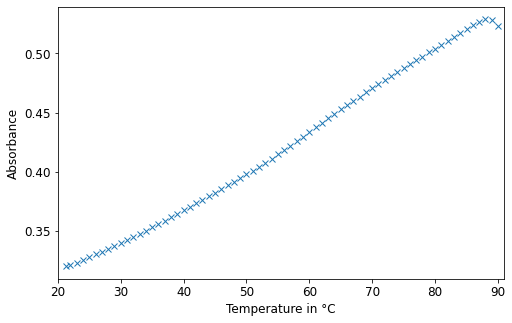

In [7]:
#Inputs to navigate to each single curve
#file name
file_name = '2023-09-19_RNA_melting_KCl.csv'
#Measurement index --> column 'Measurement' in data_obj.meta_overview
mi = 5

example_curve = data_obj.data[file_name][f'Measurement_{mi}']['data']
#print(example_curve) # hier stehen die Messwerte drin --> kann man auch auskommentieren

#Plot
fig,ax=plt.subplots(1,1, figsize=(8,5), sharex = True)
ax.plot(example_curve['Temperature (°C)'], example_curve['Absorbance'], 'x')
ax.set_xlim([20,91])
#ax.set_ylim([0.0,1.15])
ax.locator_params(axis="x", nbins=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Absorbance', fontsize=12)
ax.set_xlabel('Temperature in °C', fontsize=12)

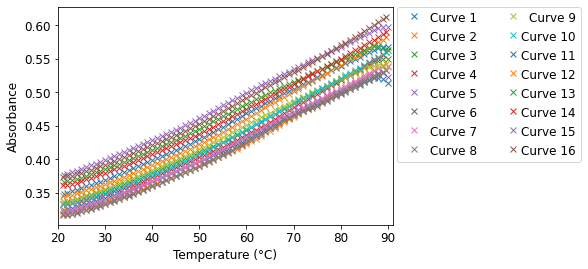

In [8]:
#Filter 'meta_overview' by input values, you will only get where inputs are true
filtered_meta_df = data_obj.apply_filters({'file_name': ['2023-09-19_RNA_melting_KCl.csv'],
                                        'Wavelength (nm)': [260]})
#Group them by some input values and run a loop, you might want to sort them by using the 'sort_values'-function -> pandas docu
grouped = filtered_meta_df.groupby(['file_name', 'Measurement']) # filenam und measurement definieren immer genau eine konkrete Kurve --> perfekte zuordnung

#Create Plot
fig, ax = plt.subplots(1,1)
legend_width = 75 # breite legende --> zusammenhang mit rechts aligned funktion oben

#Plot data
for index, group in grouped:
    file_name = index[0]
    mi = index[1]
    df = data_obj.data[file_name][f'Measurement_{mi}']['data']
    ax.plot(df['Temperature (°C)'], df['Absorbance'], 'x', label = f'Curve {mi}') # mi in legende entspricht den 'Measurement' in filtered_meta_df
ax.set_xlim([20,91])
#ax.set_ylim([0.24,0.34])
ax.locator_params(axis="x", nbins=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Absorbance', fontsize=12)
ax.set_xlabel('Temperature (°C)', fontsize=12)
first_legend = ax.legend(frameon=True, fontsize='12', loc='upper right', bbox_to_anchor=(1.58, 1.03), ncol = 2)#handlelength=0.75

#Right aligned legend
legend_text_right_align(first_legend, legend_width)

## Normalization and clipping of melting curves
For visualisation and comparisment of different environments, it is advisible to normalize your meltig curves. If you encountered some measurement failure and you want to extract just some parts of your melting curve, you can use the ''-function (TO DO for 'single use'). You may also want to use a filter function before analysis (Fourier) (TO DO).

#### 1. Normalize values to points





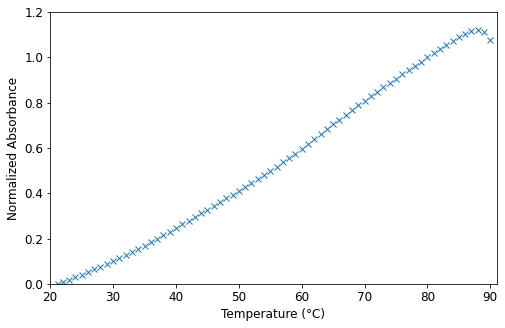

In [9]:
#file name
file_name = '2023-09-19_RNA_melting_KCl.csv'
#Measurement index
mi = 1

#Input T/x-values --> wenn ich hier nichts hinschreibe wird auf die max und min abs normiert, nicht auf definierte Temperatur
T_norm_min = 21
T_norm_max = 80

#Single curve
example_curve = data_obj.data[file_name][f'Measurement_{mi}']['data']
norm_T_curve = MeltingCurveAnalysis.normalize_data(example_curve, normalize_to=(T_norm_min, T_norm_max))

#Create Plot
fig, ax = plt.subplots(1,1, figsize=(8,5), sharex = True)
#fig.set_size_inches(12,4)
ax.plot(example_curve['Temperature (°C)'], example_curve['Normalized Absorbance'], 'x', label = f'Curve {mi}')

ax.set_xlim([20,91])
ax.set_ylim([0.0,1.2])
ax.locator_params(axis="x", nbins=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Normalized Absorbance', fontsize=12)
ax.set_xlabel('Temperature (°C)', fontsize=12)
plt.show()

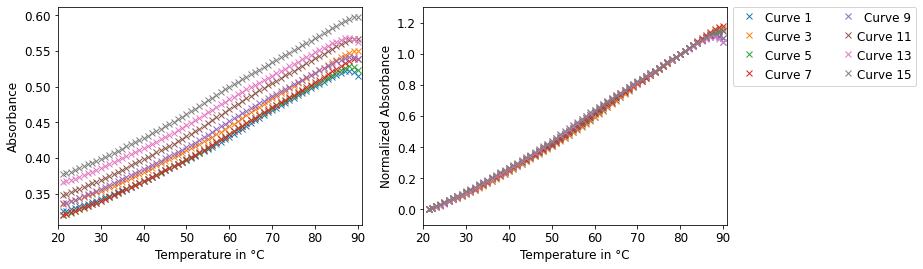

In [10]:
#file name
file_name = '2023-09-19_RNA_melting_KCl.csv'
#Measurement index
mi = 12

#Input T/x-values
T_norm_min = 21
T_norm_max = 80

#For multiple curves use for loop like before
filtered_meta_df = data_obj.apply_filters({'file_name': ['2023-09-19_RNA_melting_KCl.csv'],
                                        'Wavelength (nm)': [260], 'Ramp Type':['Cooling']})
grouped = filtered_meta_df.groupby(['file_name', 'Measurement'])
for index, group in grouped:
    file_name = index[0]
    mi = index[1]
    
    temp_curve = data_obj.data[file_name][f'Measurement_{mi}']['data']
    norm_T_curve = MeltingCurveAnalysis.normalize_data(temp_curve, normalize_to=(T_norm_min, T_norm_max))

    
#Create Plot
fig, ax = plt.subplots(1,2, sharex = True)
fig.set_size_inches(12,4)

df = data_obj.data[file_name][f'Measurement_{mi}']['data']

for index, group in grouped:
    filename = index[0]
    mi = index[1]
    df = data_obj.data[file_name][f'Measurement_{mi}']['data']
    ax[0].plot(df['Temperature (°C)'], df['Absorbance'], 'x', label = f'Curve {mi}')
    ax[1].plot(df['Temperature (°C)'], df['Normalized Absorbance'], 'x', label = f'Curve {mi}')

ax[0].set_ylabel('Absorbance', fontsize=12)
ax[0].set_xlabel('Temperature in °C', fontsize=12)
ax[0].set_xlim([20,91])
#ax[0].set_ylim([0.24,0.34])
ax[0].locator_params(axis="x", nbins=10)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].set_ylabel('Normalized Absorbance', fontsize=12)
ax[1].set_xlabel('Temperature in °C', fontsize=12)
ax[1].set_xlim([20,91])
ax[1].set_ylim([-0.1,1.3])
ax[1].locator_params(axis="x", nbins=10)
ax[1].tick_params(axis='both', labelsize=12)
first_legend = ax[1].legend(frameon=True, fontsize='12', loc='upper right', bbox_to_anchor=(1.64, 1.03),ncol = 2)
#Right align legend
legend_text_right_align(first_legend, legend_width)

## Hier werden fuer alle Messungen innerhalb der angegebenen CSV die normierten Daten erzeugt

In [11]:
#file name
file_name = '2023-09-19_RNA_melting_KCl.csv'
#Measurement index
all_collected_data = []
for i in range(1, 17):
    mi = i

    #Input T/x-values
    T_norm_min = 21
    T_norm_max = 80

    #For multiple curves use for loop like before
    filtered_meta_df = data_obj.apply_filters({'file_name': ['2023-09-19_RNA_melting_KCl.csv'],
                                            'Wavelength (nm)': [260]})
    grouped = filtered_meta_df.groupby(['file_name', 'Measurement'])
    for index, group in grouped:
        file_name = index[0]
        mi = index[1]

        temp_curve = data_obj.data[file_name][f'Measurement_{mi}']['data']
        norm_T_curve = MeltingCurveAnalysis.normalize_data(temp_curve, normalize_to=(T_norm_min, T_norm_max))
        all_collected_data.append(norm_T_curve)

complete_2023_09_19_KCl = pd.concat(all_collected_data)
complete_2023_09_19_KCl.to_csv('complete_2023_09_19_KCl.csv', sep='\t', encoding='utf-8')
complete_2023_09_19_KCl

,Temperature (°C),Absorbance,Measurement,Meta,Date,Cell_Number,Normalized Absorbance
0,90.000000,0.514418,1,100 mM KCl_260.00nm_90.0-21.0C,2023-09-19 10:22:18 (+02:00),Cell 4,1.076154
1,89.000000,0.520609,1,100 mM KCl_260.00nm_90.0-21.0C,2023-09-19 10:22:18 (+02:00),Cell 4,1.111304
2,88.000000,0.522104,1,100 mM KCl_260.00nm_90.0-21.0C,2023-09-19 10:22:18 (+02:00),Cell 4,1.119795
3,87.000000,0.521356,1,100 mM KCl_260.00nm_90.0-21.0C,2023-09-19 10:22:18 (+02:00),Cell 4,1.115547
4,86.000000,0.519139,1,100 mM KCl_260.00nm_90.0-21.0C,2023-09-19 10:22:18 (+02:00),Cell 4,1.102961
...,...,...,...,...,...,...,...
1115,86.000000,0.596036,16,10 mM KCl_260.00nm_21.0-90.0C_R1,2023-09-19 10:22:18 (+02:00),Cell 7,1.132383
1116,87.000000,0.600460,16,10 mM KCl_260.00nm_21.0-90.0C_R1,2023-09-19 10:22:18 (+02:00),Cell 7,1.154949
1117,88.000000,0.604854,16,10 mM KCl_260.00nm_21.0-90.0C_R1,2023-09-19 10:22:18 (+02:00),Cell 7,1.177368
1118,89.000000,0.609041,16,10 mM KCl_260.00nm_21.0-90.0C_R1,2023-09-19 10:22:18 (+02:00),Cell 7,1.198730


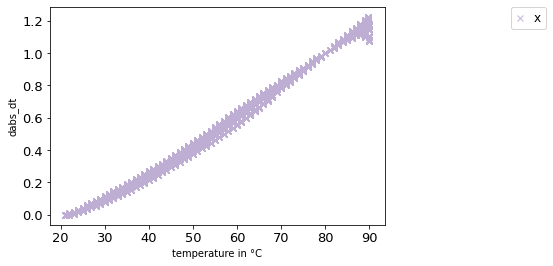

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
temps = 8
palette = plt.get_cmap('Accent',temps)
# draw plot for the two plots
ax.scatter(complete_2023_09_19_KCl["Temperature (°C)"], complete_2023_09_19_KCl["Normalized Absorbance"], marker='x', color=palette(1), linewidth=1, alpha=0.9, label='x')
ax.tick_params(axis='both', labelsize=13)
ax.locator_params(axis="y", nbins=10)
ax.locator_params(axis="x", nbins=10)
ax.legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper right', bbox_to_anchor=(1.5, 1.03))
#ax.set_xlim([40,60])
#ax.set_ylim([-0.01,0.04])
#ax.set_title("absorption at 260 nm")
plt.xlabel('temperature in °C')
plt.ylabel("dabs_dt")
#plt.savefig("2024-02-23_RNA_CaCl2_melting3.png", dpi=600, bbox_inches="tight")
plt.show()

#### 3. Crop curves
To remove datapoints, use the 'filter_by_values'-function. Every fit-function  also receives a filter array as an optional input paramter.

Text(0.5, 1.0, 'Multiple filter areas')

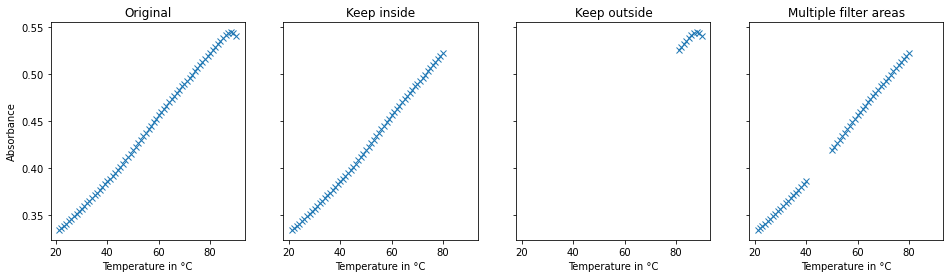

In [13]:
#file name
file_name = '2023-09-20_RNA_melting_KCl.csv'
#Measurement index
mi = 5

#-----------------------
#x ist festgelegt als Temperatur, y ist festgelegt als absorbance
#filter_bounds: dict = {'column_x': 'Temperature (°C)', 'column_y': 'Absorbance', 'x_min': -np.inf, 'y_min':- np.inf, 'x_max': np.inf, 'y_max': np.inf, 'keep_inside': True}
#-----------------------
filter_bounds_inside = {'x_max': 80}
filter_bounds_outside = {'x_max': 80, 'keep_inside': False} # keep_inside = True alls was innerhalb der angegebenen Grenzen liegt wird behalten, alles ausserhalb wird weggeschnitten, das ist default einstellung
filter_bounds_multi = [{'x_max': 40}, {'x_min': 50, 'x_max': 80}, {'x_min':80, 'y_max': 0.315, 'keep_inside': True}]

#Calculation
df = data_obj.data[file_name][f'Measurement_{mi}']['data']
filtered_inside = MeltingCurveAnalysis.filter_by_values(df, filter_bounds_inside)
filtered_outside = MeltingCurveAnalysis.filter_by_values(df, filter_bounds_outside)

#Multiple filters at once: watch out for intersecting filter bounds!
filtered_multi = MeltingCurveAnalysis.filter_multiple_times(df, filter_bounds_multi)


#Create Plot
fig, ax = plt.subplots(1,4, sharex = True, sharey = True)
fig.set_size_inches(16,4)

ax[0].plot(df['Temperature (°C)'], df['Absorbance'], 'x')
ax[1].plot(filtered_inside['Temperature (°C)'], filtered_inside['Absorbance'], 'x')
ax[2].plot(filtered_outside['Temperature (°C)'], filtered_outside['Absorbance'], 'x')
ax[3].plot(filtered_multi['Temperature (°C)'], filtered_multi['Absorbance'], 'x')

ax[0].set_ylabel('Absorbance')
ax[0].set_xlabel('Temperature in °C')

ax[1].set_xlabel('Temperature in °C')

ax[2].set_xlabel('Temperature in °C')
ax[3].set_xlabel('Temperature in °C')

ax[0].set_title('Original')
ax[1].set_title('Keep inside')
ax[2].set_title('Keep outside')
ax[3].set_title('Multiple filter areas')


In [14]:
file_name = '2023-09-20_RNA_melting_KCl.csv'
mi = 5#Measurement index
example_curve2 = data_obj.data[file_name][f'Measurement_{mi}']['data']
example_curve2

,Temperature (°C),Absorbance,Measurement,Meta,Date,Cell_Number
280,90.000000,0.541309,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
281,89.000000,0.544198,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
282,88.000000,0.544854,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
283,87.000000,0.544258,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
284,86.000000,0.541969,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
...,...,...,...,...,...,...
345,25.000000,0.343408,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
346,24.000000,0.340547,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
347,23.000000,0.338038,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5
348,22.000000,0.335717,5,5 mM KCl_260.00nm_90.0-21.0C,2023-09-20 10:03:11 (+02:00),Cell 5


## Fit

parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,gi,file_name,Sample,...,direct_melt_m1,direct_melt_Dm1,direct_melt_n1,direct_melt_Dn1,direct_melt_m2,direct_melt_Dm2,direct_melt_n2,direct_melt_Dn2,direct_melt_DS_J/mol/K,direct_melt_DDS
832,1,516 mM KCl,260.0,90.0,21.0,1,Cooling,833,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.004931,0.000103,-1.087186,0.032770,0.005805,0.000354,-1.342899,0.130185,-419.076339,34.100499
833,2,516 mM KCl,260.0,21.0,90.0,1,Heating,834,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.005417,0.000072,-1.255496,0.023243,0.007206,0.000177,-1.851396,0.064259,-584.801527,39.978459
834,3,516 mM KCl,260.0,90.0,21.0,2,Cooling,835,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.005430,0.000048,-1.230779,0.015409,0.006949,0.000057,-1.735273,0.020909,-519.546764,22.226478
835,4,516 mM KCl,260.0,21.0,90.0,2,Heating,836,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.005521,0.000072,-1.273541,0.023312,0.007316,0.000213,-1.867611,0.077268,-556.963535,35.353360
836,5,116 mM KCl,260.0,90.0,21.0,1,Cooling,837,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.005629,0.000050,-1.311621,0.016309,0.006707,0.000015,-1.666624,0.005470,-856.686625,86.935262
837,6,116 mM KCl,260.0,21.0,90.0,1,Heating,838,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.002195,0.001665,-0.304173,0.454324,-0.004394,0.392447,3.346765,166.372981,-97.264307,148.985886
838,7,116 mM KCl,260.0,90.0,21.0,2,Cooling,839,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.004934,0.000083,-1.072803,0.025312,0.006581,0.000157,-1.588201,0.057726,-335.177180,23.189110
839,8,116 mM KCl,260.0,21.0,90.0,2,Heating,840,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.004777,0.000122,-1.039368,0.037380,0.002673,0.001084,-0.206541,0.395508,-328.718735,27.527056
840,9,66 mM KCl,260.0,90.0,21.0,1,Cooling,841,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.004625,0.000092,-0.979879,0.027602,0.006026,0.000234,-1.402228,0.085578,-311.815935,23.521510
841,10,66 mM KCl,260.0,21.0,90.0,1,Heating,842,2024-01-26_RNA_melting_KCl.csv,RNA,...,0.003852,0.000222,-0.760747,0.064490,0.004088,0.002500,-0.639480,0.948816,-200.514810,18.077877


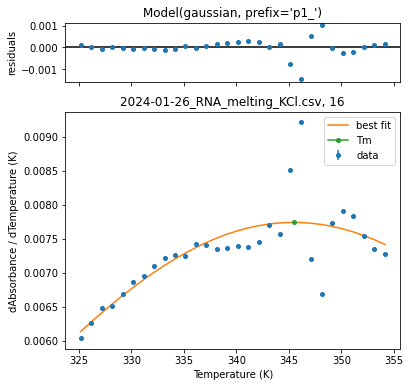

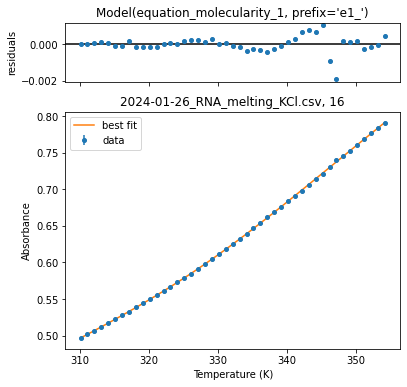

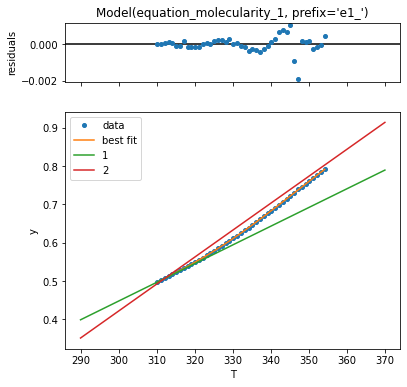

In [278]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2024-01-26_RNA_melting_KCl.csv'
#Measurement index
mi = 16

#### Derivate and Fit
data_obj.derivative_fit(file_name, mi, filter_bounds = [{'column_x': 'Temperature (K)', 'x_min': 325, 'x_max' : 355}], num_peaks = 1)# max 380, min 295

#### Direct Melting
model1 = MeltingCurveAnalysis.create_model_e1()
model2 = MeltingCurveAnalysis.create_model_e2()
model3 = MeltingCurveAnalysis.create_model_e2_e1()

data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_min': 310, 'x_max' : 355}])
data_obj.get_direct_melt_result(file_name, mi)

data_obj._add_results_to_meta()
data_obj._create_meta_overview()
data_obj.meta_overview
data_obj.apply_filters({'file_name': ['2024-01-26_RNA_melting_KCl.csv']})

In [280]:
results_09_01 = data_obj.meta_overview
#results_09_01.loc[results_09_01['file_name'] == '2023-09-21_RNA_melting_NaCl.csv']
results_09_01.to_csv('results_2024-06-12_KCl_teil2.csv', sep='\t', encoding='utf-8')

In [17]:
#from main import  *

#data_obj._add_results_to_meta()
#data_obj._create_meta_overview()
#data_obj.meta_overview
#data_obj.apply_filters({'file_name': ['2024-02-01_RNA_melting_NaCl.csv']})

In [18]:
list(results_09_01)

['Measurement',
 'Sample Name',
 'Wavelength (nm)',
 'Temperature Start (°C)',
 'Temperature End (°C)',
 'Run',
 'Ramp Type',
 'gi',
 'file_name',
 'Sample',
 'bg in mM',
 '[Buffer] in mM',
 'Monovalent Ion',
 'Concentration',
 'Concentration Unit',
 'deri_fit_Tm_C',
 'deri_fit_dEd/dT',
 'deri_fit_DTm',
 'direct_melt_Tm_C',
 'direct_melt_DTm',
 'direct_melt_DH_J/mol',
 'direct_melt_DDH',
 'direct_melt_m1',
 'direct_melt_Dm1',
 'direct_melt_n1',
 'direct_melt_Dn1',
 'direct_melt_m2',
 'direct_melt_Dm2',
 'direct_melt_n2',
 'direct_melt_Dn2',
 'direct_melt_DS_J/mol/K',
 'direct_melt_DDS']